In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Assignment 02

## Exercise 02.1

### 1.

In [2]:
def test_func(x):
    return (x[0] - 1)**4 + (x[1] - 1)**4 + 10 * (x[0] ** 2) * x[1]

In [3]:
x_space = np.linspace(-10, 10, 1000)
y_space = np.linspace(-10, 10, 1000)
f_vals = np.array([test_func([x, y]) for x in x_space for y in y_space])

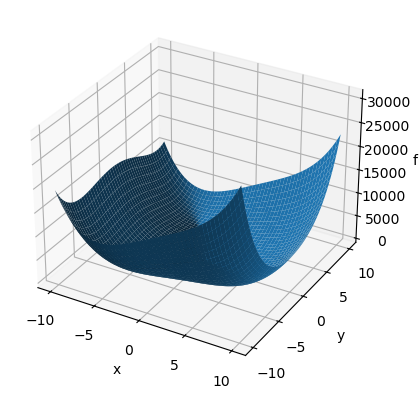

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
X, Y = np.meshgrid(x_space, y_space)
Z = f_vals.reshape(Y.shape)

ax.plot_surface(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f')
plt.show()

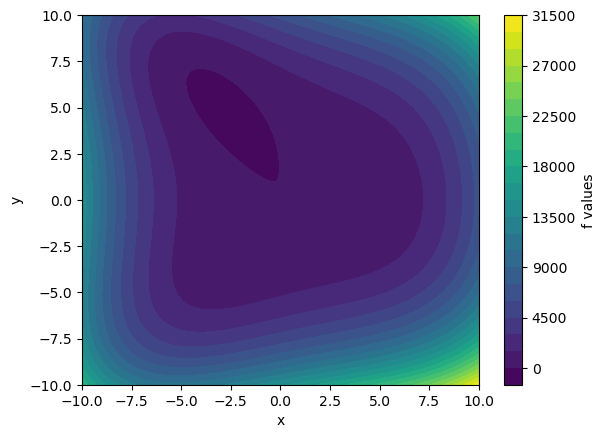

In [5]:
plt.contourf(X, Y, Z, 30)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='f values')
plt.show()

Taking the gradient function of before

In [81]:
def gradient(func, eval_point, h):
    dim = len(eval_point)
    grad = np.zeros(dim)
    hmat = h * np.eye(dim)
    for ind in range(0,dim):
        grad[ind] = (func(eval_point + hmat[ind]) - func(eval_point - hmat[ind]))/(2*h)
    return grad

In [94]:
def grad_desc(func, initial_guess, learning_rate, h, conv_criterion, max_iterations):
    pts = [initial_guess]
    for i in range(max_iterations):
        if np.linalg.norm(gradient(func, pts[i], h)) <  conv_criterion:
            return np.array(pts), 'Convergence reached'
        pts.append(pts[i] - learning_rate * gradient(func, pts[i], h))
    return np.array(pts), 'Maximum iterations reached'     

In [111]:
path_1 = grad_desc(test_func, [6, 2], 0.001, 1e-4, 1e-2, 100)[0]
path_2 = grad_desc(test_func, [0, -5], 0.001, 1e-4, 1e-4, 1000)[0]
path_3 = grad_desc(test_func, [-3, 3], 0.001, 1e-4, 1e-4, 1000)[0]
path_4 = grad_desc(test_func, [7, 5], 0.001, 1e-4, 1e-4, 1000)[0]
path_5 = grad_desc(test_func, [7, -5], 0.0001, 1e-4, 1e-4, 1000)[0]
path_6 = grad_desc(test_func, [3, -6], 0.001, 1e-4, 1e-4, 1000)[0]
path_7 = grad_desc(test_func, [8, 0], 0.001, 1e-4, 1e-4, 1000)[0]
path_8 = grad_desc(test_func, [6, 3.5], 0.0001, 1e-4, 1e-4, 10000)[0]
path_9 = grad_desc(test_func, [6, 3.6], 0.0001, 1e-4, 1e-4, 10000)[0]


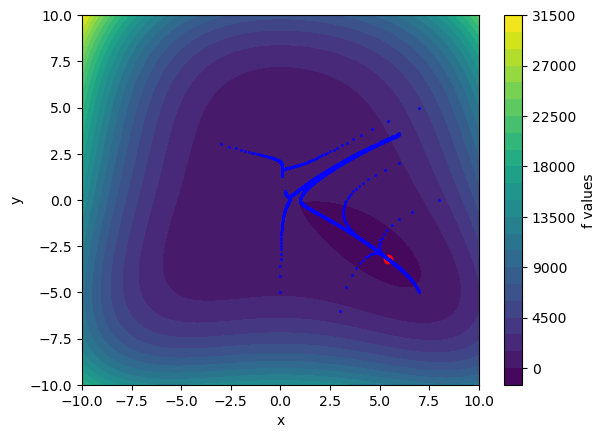

In [112]:
plt.contourf(Y, X, Z, 30)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='f values')
plt.plot( 5.42127292, -3.18839108, 'ro')
plt.plot(path_1[:,0], path_1[:,1], 'bo', markersize=1)
plt.plot(path_2[:,0], path_2[:,1], 'bo', markersize=1)
plt.plot(path_3[:,0], path_3[:,1], 'bo', markersize=1)
plt.plot(path_4[:,0], path_4[:,1], 'bo', markersize=1)
plt.plot(path_5[:,0], path_5[:,1], 'bo', markersize=1)
plt.plot(path_6[:,0], path_6[:,1], 'bo', markersize=1)
plt.plot(path_7[:,0], path_7[:,1], 'bo', markersize=1)
plt.plot(path_8[:,0], path_8[:,1], 'bo', markersize=1)
plt.plot(path_9[:,0], path_9[:,1], 'bo', markersize=1)
plt.show()

The gradient descent method seems to be very sensitive to the step size and to the initial value where one starts...

### 3.

In [113]:
def momentum_grad_desc(func, initial_guess, learning_rate, h, conv_criterion, max_iterations, damping):
    pts = [initial_guess]
    mom = [0.0]
    for i in range(max_iterations):
        if np.linalg.norm(gradient(func, pts[i], h)) <  conv_criterion:
            return np.array(pts), 'Convergence reached'
        mom.append(damping * mom[i] - learning_rate * gradient(func, pts[i], h))
        pts.append(pts[i] + mom[i+1])
    return np.array(pts), 'Maximum iterations reached'   

In [198]:
path_mom_1 = momentum_grad_desc(test_func, [6, 2], 0.001, 1e-4, 1e-4, 1000, 0.5)[0]
path_mom_2 = momentum_grad_desc(test_func, [6, 3.6], 0.001, 1e-4, 1e-4, 1000, 0.5)[0]
path_mom_3 = momentum_grad_desc(test_func, [6, 3.6], 0.002, 1e-4, 1e-4, 20000, 0.9)[0]
path_mom_4 = momentum_grad_desc(test_func, [0, -5], 0.002, 1e-4, 1e-4, 20000, 0.91)[0]

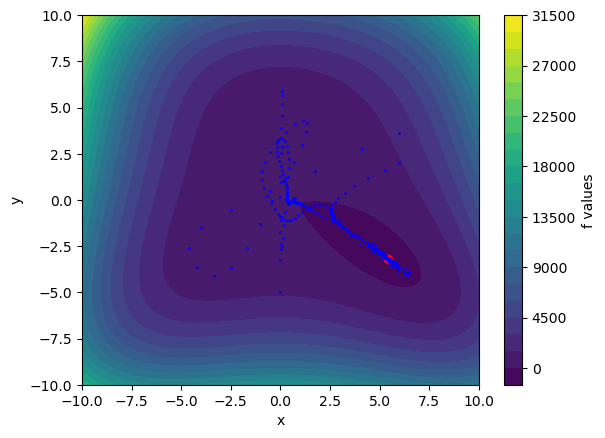

In [200]:
plt.contourf(Y, X, Z, 30)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='f values')
plt.plot( 5.42127292, -3.18839108, 'ro')
plt.plot(path_mom_1[:,0], path_mom_1[:,1], 'bo', markersize=1)
#plt.plot(path_mom_2[:,0], path_mom_2[:,1], 'bo', markersize=1)
plt.plot(path_mom_3[:,0], path_mom_3[:,1], 'bo', markersize=1)
plt.plot(path_mom_4[:,0], path_mom_4[:,1], 'bo', markersize=1)
#plt.plot(path_5[:,0], path_5[:,1], 'bo', markersize=1)
#plt.plot(path_6[:,0], path_6[:,1], 'bo', markersize=1)
#plt.plot(path_7[:,0], path_7[:,1], 'bo', markersize=1)
#plt.plot(path_8[:,0], path_8[:,1], 'bo', markersize=1)
#plt.plot(path_9[:,0], path_9[:,1], 'bo', markersize=1)
plt.show()

The effect of the parameter 'damping' is that the points of the algorithm are allowed to 'overshoot' local minima, thereby helping the algorithm not to get stuck. It seems beneficial to slightly increase the learning rate when working with damping.

## Exercise 02.2

### 1.

In [257]:
sigma = 2000
theta_true = [3000, 5000]
def true_model(x):
    return theta_true[0] * x + theta_true
xs = np.linspace(0, 10, 200)
data = [[x, true_model(x) + np.random.normal(0, sigma)] for x in xs]

rand_ind_set = np.random.choice(range(200), 160, replace=False)

training_data = np.array([data[n] for n in rand_ind_set])

def sort_func(x):
    if x in rand_ind_set:
        return False
    else:
        return True
ind_set_compl = list(filter(sort_func, range(200)))
test_data = np.array([data[n] for n in ind_set_compl])

In [246]:
training_data[0,:]

array([3.01507538e-01, 8.09162169e+03])

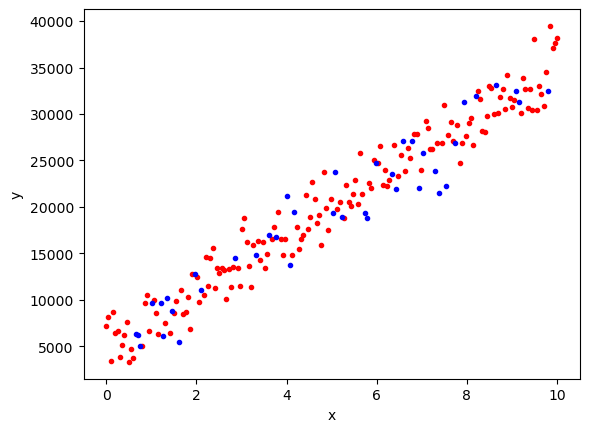

In [258]:
plt.scatter(training_data[:,0], training_data[:,1], marker='.', color='red')
plt.scatter(test_data[:,0], test_data[:,1], marker='.', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 2.

Fitting an order 159 polynomial to this curve is not very reasonable as any additional data point will lead to a global change of the curve. So this would correspond, I guess, to strong overfitting. Taking the mean of the y-values is too coarse and will lead to most of the points being either under- or over estimated.

### 3.

In [339]:
def mean_squared_error(theta):
    data_set = training_data
    N = len(data_set)
    MSE = 0
    for i in range(N):
        MSE += (1/N) * (data_set[i, 1] - (theta[0] * data_set[i, 0] + theta[1]))**2
    return MSE

theta_0s = np.linspace(2500, 3500, 100)
theta_1s = np.linspace(4500, 5500, 100)
MSE_vals = np.array([mean_squared_error([a, b]) for a in theta_0s for b in theta_1s])

A, B = np.meshgrid(theta_0s, theta_1s)
Z = mean_squared_error([A, B])


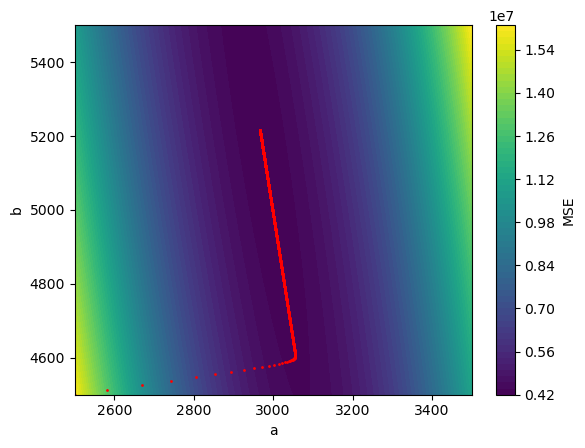

In [340]:
plt.contourf(A, B, Z, 60)
plt.xlabel('a')
plt.ylabel('b')
plt.colorbar(label='MSE')
path_good = momentum_grad_desc(mean_squared_error, [2500, 4500], 0.002, 1e-4, 1e-4, 10000, 0.2)[0]
plt.plot(path_good[:,0], path_good[:,1], 'ro', markersize=1)
plt.show()

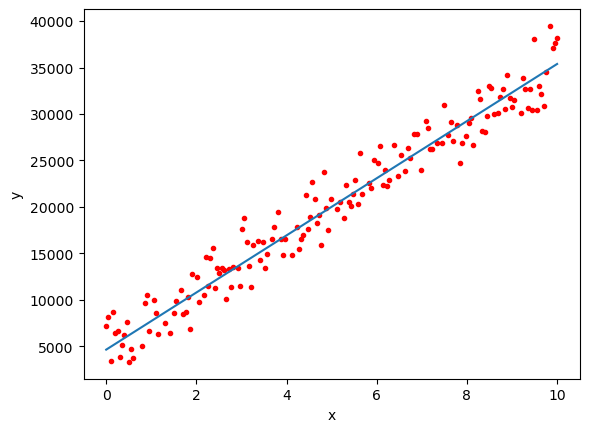

In [317]:
plt.scatter(training_data[:,0], training_data[:,1], marker='.', color='red')
xfine = np.linspace(0, 10, 1000)
prediction = np.array([[x, path_good[100, 0] * x + path_good[100, 1]] for x in xfine])
plt.plot(prediction[:,0], prediction[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 4.

Does the prediction generalize well?

In [320]:
theta_pred = path_good[100]
MSE_training = mean_squared_error(theta_pred)
MSE_test = 0
data_set = test_data
N = len(data_set)
MSE = 0
for i in range(N):
    MSE_test += (1/N) * (data_set[i, 1] - (theta_pred[0] * data_set[i, 0] + theta_pred[1]))**2

print('The MSE of the training data is MSE_training = ', MSE_training)
print('In comparison, the MSE of the test data MSE_test = ', MSE_test)


The MSE of the training data is MSE_training =  3888878.5643734755
In comparison, the MSE of the test data MSE_test =  6069294.24089089


It's the same order of magnitude (important here as we work with big numbers) but there is some deviation visible.

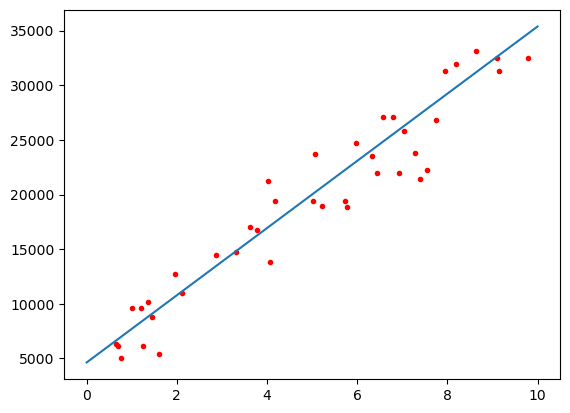

In [321]:
plt.scatter(test_data[:,0], test_data[:,1], marker='.', color='red')
plt.plot(prediction[:,0], prediction[:,1])
plt.show()

### 5.

What happens if we reduce the size of training data or increase the standard deviation of the actual model?

In [322]:
def mean_squared_error_datainput(theta, data_set):
    data_set
    N = len(data_set)
    MSE = 0
    for i in range(N):
        MSE += (1/N) * (data_set[i, 1] - (theta[0] * data_set[i, 0] + theta[1]))**2
    return MSE

rand_ind_set = np.random.choice(range(200), 100, replace=False)

training_data = np.array([data[n] for n in rand_ind_set])

def sort_func(x):
    if x in rand_ind_set:
        return False
    else:
        return True
ind_set_compl = list(filter(sort_func, range(200)))
test_data = np.array([data[n] for n in ind_set_compl])

In [331]:
pred = momentum_grad_desc(mean_squared_error, [3000, 5000], 0.002, 1e-4, 1e-4, 10000, 0.4)[0][8878-1]

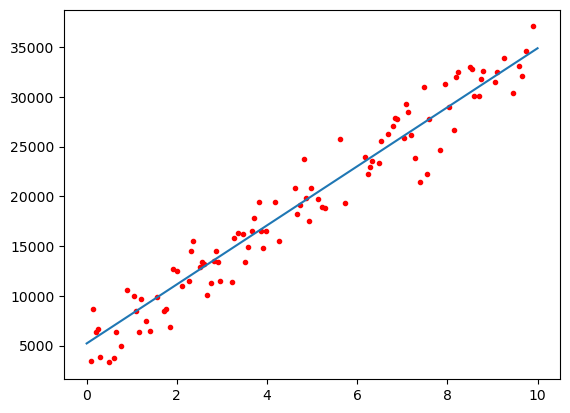

In [334]:
plt.scatter(test_data[:,0], test_data[:,1], marker='.', color='red')
prediction = np.array([[x, pred[0] * x + pred[1]] for x in xfine])
plt.plot(prediction[:,0], prediction[:,1])
plt.show()

In [337]:
print('MSE for training data at minimum = ', mean_squared_error_datainput(pred, training_data))
print('MSE for test data at minimum = ', mean_squared_error_datainput(pred, test_data))

MSE for training data at minimum =  4260393.254181909
MSE for test data at minimum =  4369940.69137567


Here, the deviation is actually smaller. I suppose that for a bigger sample size the effect would look different.